# 💠ARTIFICIAL NEURAL NETWORKS💠

In [1]:
import string
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split
from keras import models                                         
from keras.layers import Dense,Dropout 
from tensorflow.keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier 
import livelossplot                                               

## 💠Data Exploration and Preprocessing

In [2]:
data=pd.read_csv('Alphabets_data.csv')
print('Shape of data ',data.shape)
data.head()

Shape of data  (20000, 17)


,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [3]:
data.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [4]:
data.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


Number of unique letters  26


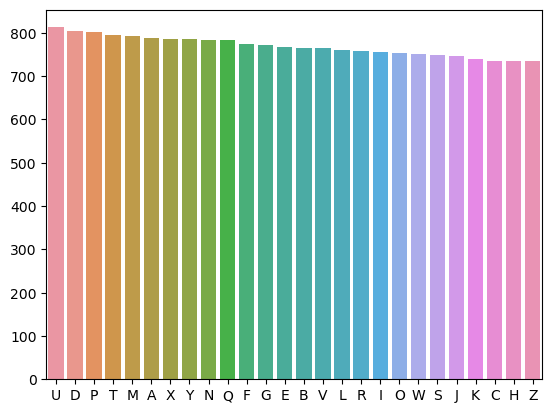

In [5]:
print('Number of unique letters ',len(data['letter'].unique()))

d=data['letter'].value_counts()
sns.barplot(x=d.index,y=d.values)
plt.show()

## 💠Model Implementation

In [6]:
X=data.drop('letter',axis=1)
Y=data['letter']

X=X.astype('float32') / 15

Y=Y.replace(list(string.ascii_uppercase),[x for x in range(26)])
Y=to_categorical(Y,26)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

print('▶Shape of X_train,y_train',(X_train.shape,y_train.shape))
print('▶Shape of X_test,y_test',(X_test.shape,y_test.shape))

▶Shape of X_train,y_train ((16000, 16), (16000, 26))
▶Shape of X_test,y_test ((4000, 16), (4000, 26))


In [7]:
Model=models.Sequential()                                            
Model.add(Dense(256,activation='relu',input_shape=(16,)))
Model.add(Dropout(0.5))
Model.add(Dense(128,activation='relu'))
Model.add(Dropout(0.5))
Model.add(Dense(26,activation='softmax'))

Model.summary()

C:\Users\MAYUR\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           4,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 26)                  │           3,354 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,602 (158.60 KB)

 Trainable params: 40,602 (158.60 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
Model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

plot_losses=livelossplot.PlotLossesKeras()

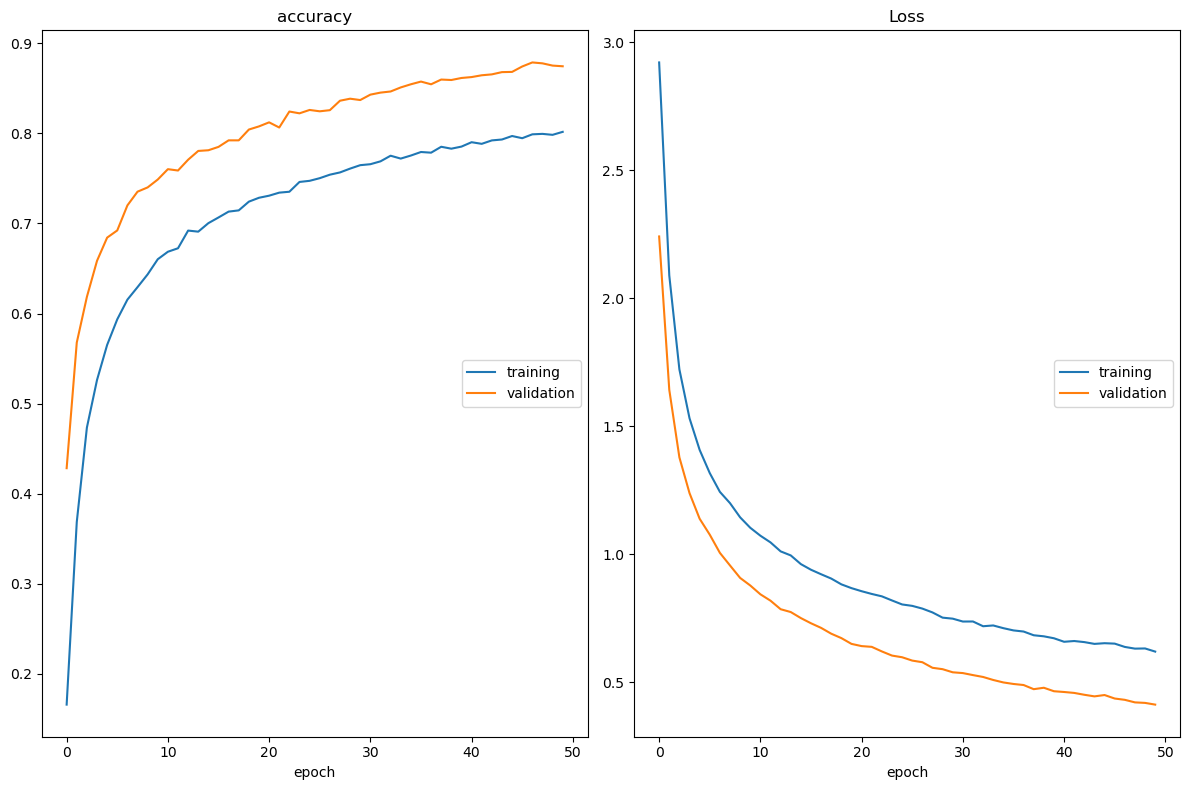

accuracy
	training         	 (min:    0.166, max:    0.802, cur:    0.802)
	validation       	 (min:    0.428, max:    0.879, cur:    0.874)
Loss
	training         	 (min:    0.620, max:    2.921, cur:    0.620)
	validation       	 (min:    0.413, max:    2.241, cur:    0.413)


In [9]:
Model.fit(X_train, y_train,                                                   
          batch_size=100,
          epochs=50,
          callbacks=[plot_losses],
          verbose=0,
          validation_data=(X_test, y_test))

In [10]:
score_train = Model.evaluate(X_train, y_train, verbose=0)             
print('Accuracy on training data   ',score_train[1])

score_test= Model.evaluate(X_test, y_test, verbose=0)                    
print('Accuracy on testing data   ',score_test[1])

Accuracy on training data    0.8943750262260437
Accuracy on testing data    0.8744999766349792


## 💠Hyperparameter tuning using GridSearchCV and KerasClassifier

### Note : I have used less number of parameters because of very long exicution time and processing power limitations.

In [36]:
def Build_model():
    Model=models.Sequential()                                            
    Model.add(Dense(units=256,activation='relu',input_shape=(16,)))
    Model.add(Dropout(0.5))
    Model.add(Dense(units=256//2,activation='relu'))
    Model.add(Dropout(0.5))
    Model.add(Dense(26,activation='softmax'))
    Model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return Model
    

In [37]:
model=KerasClassifier(build_fn=Build_model)

params={'batch_size':[25,50],  
        'epochs':[30, 50, 75]
         }

In [38]:
gs=GridSearchCV(estimator=model, param_grid=params, cv=5) 
gs = gs.fit(X_train, y_train)

Epoch 1/30


C:\Users\MAYUR\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\MAYUR\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


512/512 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1318 - loss: 3.0185
Epoch 2/30
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4231 - loss: 1.8740
Epoch 3/30
512/512 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5207 - loss: 1.5416
Epoch 4/30
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5707 - loss: 1.3681
Epoch 5/30
512/512 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6043 - loss: 1.2712
Epoch 6/30
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6339 - loss: 1.1697
Epoch 7/30
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6574 - loss: 1.1125
Epoch 8/30
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6637 - loss: 1.0692
Epoch 9/30
512/512 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6748 - loss: 1.0242
Epoch 10/30
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6895 - loss: 0.9914
Epoch 11/30
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6994 - loss: 0.9538
Epoch 12/30
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy

C:\Users\MAYUR\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\MAYUR\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


512/512 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1326 - loss: 2.9986
Epoch 2/30
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4276 - loss: 1.8643
Epoch 3/30
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5281 - loss: 1.5312
Epoch 4/30
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5782 - loss: 1.3494
Epoch 5/30
512/512 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6056 - loss: 1.2616
Epoch 6/30
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6269 - loss: 1.1742
Epoch 7/30
512/512 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6531 - loss: 1.1023
Epoch 8/30
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6701 - loss: 1.0472
Epoch 9/30
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6857 - loss: 1.0104
Epoch 10/30
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6977 - loss: 0.9639
Epoch 11/30
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7029 - loss: 0.9463
Epoch 12/30
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy

C:\Users\MAYUR\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\MAYUR\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


512/512 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1337 - loss: 3.0001
Epoch 2/30
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4204 - loss: 1.8769
Epoch 3/30
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5172 - loss: 1.5338
Epoch 4/30
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5686 - loss: 1.3726
Epoch 5/30
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6064 - loss: 1.2469
Epoch 6/30
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6269 - loss: 1.1950
Epoch 7/30
512/512 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6386 - loss: 1.1487
Epoch 8/30
512/512 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6506 - loss: 1.0846
Epoch 9/30
512/512 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6818 - loss: 1.0248
Epoch 10/30
512/512 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6789 - loss: 1.0127
Epoch 11/30
512/512 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6892 - loss: 0.9871
Epoch 12/30
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy

C:\Users\MAYUR\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\MAYUR\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


512/512 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1372 - loss: 2.9943
Epoch 2/30
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4221 - loss: 1.8820
Epoch 3/30
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5224 - loss: 1.5287
Epoch 4/30
512/512 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5759 - loss: 1.3661
Epoch 5/30
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6125 - loss: 1.2526
Epoch 6/30
512/512 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6219 - loss: 1.2033
Epoch 7/30
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6535 - loss: 1.1204
Epoch 8/30
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6634 - loss: 1.0668
Epoch 9/30
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6701 - loss: 1.0390
Epoch 10/30
512/512 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6890 - loss: 0.9740
Epoch 11/30
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6981 - loss: 0.9572
Epoch 12/30
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy

C:\Users\MAYUR\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\MAYUR\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


512/512 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1367 - loss: 2.9980
Epoch 2/30
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4257 - loss: 1.8570
Epoch 3/30
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5229 - loss: 1.5400
Epoch 4/30
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5772 - loss: 1.3650
Epoch 5/30
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6161 - loss: 1.2438
Epoch 6/30
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6365 - loss: 1.1687
Epoch 7/30
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6470 - loss: 1.1238
Epoch 8/30
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6672 - loss: 1.0778
Epoch 9/30
512/512 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6924 - loss: 1.0033
Epoch 10/30
512/512 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6941 - loss: 0.9694
Epoch 11/30
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6989 - loss: 0.9368
Epoch 12/30
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy

C:\Users\MAYUR\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\MAYUR\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


512/512 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1323 - loss: 3.0228
Epoch 2/50
512/512 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4084 - loss: 1.9158
Epoch 3/50
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5158 - loss: 1.5527
Epoch 4/50
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5683 - loss: 1.3750
Epoch 5/50
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6093 - loss: 1.2464
Epoch 6/50
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6251 - loss: 1.2029
Epoch 7/50
512/512 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6550 - loss: 1.1236
Epoch 8/50
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6587 - loss: 1.0771
Epoch 9/50
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6684 - loss: 1.0422
Epoch 10/50
512/512 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6957 - loss: 0.9799
Epoch 11/50
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6953 - loss: 0.9617
Epoch 12/50
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy

C:\Users\MAYUR\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\MAYUR\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


512/512 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1418 - loss: 2.9700
Epoch 2/50
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4366 - loss: 1.8229
Epoch 3/50
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5307 - loss: 1.5104
Epoch 4/50
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5823 - loss: 1.3533
Epoch 5/50
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6138 - loss: 1.2399
Epoch 6/50
512/512 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6463 - loss: 1.1552
Epoch 7/50
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6608 - loss: 1.0967
Epoch 8/50
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6700 - loss: 1.0533
Epoch 9/50
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6857 - loss: 1.0053
Epoch 10/50
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6963 - loss: 0.9658
Epoch 11/50
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7028 - loss: 0.9262
Epoch 12/50
512/512 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy

C:\Users\MAYUR\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\MAYUR\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


512/512 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1347 - loss: 2.9865
Epoch 2/50
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4388 - loss: 1.8217
Epoch 3/50
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5380 - loss: 1.4887
Epoch 4/50
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5811 - loss: 1.3230
Epoch 5/50
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6263 - loss: 1.2112
Epoch 6/50
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6402 - loss: 1.1408
Epoch 7/50
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6594 - loss: 1.0893
Epoch 8/50
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6809 - loss: 1.0353
Epoch 9/50
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6943 - loss: 0.9805
Epoch 10/50
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6902 - loss: 0.9677
Epoch 11/50
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7051 - loss: 0.9223
Epoch 12/50
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy

C:\Users\MAYUR\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\MAYUR\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


512/512 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1270 - loss: 3.0047
Epoch 2/50
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4002 - loss: 1.9368
Epoch 3/50
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5166 - loss: 1.5602
Epoch 4/50
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5620 - loss: 1.4151
Epoch 5/50
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6002 - loss: 1.2748
Epoch 6/50
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6260 - loss: 1.2117
Epoch 7/50
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6565 - loss: 1.1073
Epoch 8/50
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6638 - loss: 1.0793
Epoch 9/50
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6773 - loss: 1.0291
Epoch 10/50
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6934 - loss: 0.9867
Epoch 11/50
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6891 - loss: 0.9770
Epoch 12/50
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy

C:\Users\MAYUR\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\MAYUR\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


512/512 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1318 - loss: 3.0111
Epoch 2/50
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4210 - loss: 1.8866
Epoch 3/50
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5117 - loss: 1.5705
Epoch 4/50
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5794 - loss: 1.3748
Epoch 5/50
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6139 - loss: 1.2402
Epoch 6/50
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6345 - loss: 1.1732
Epoch 7/50
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6416 - loss: 1.1319
Epoch 8/50
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6636 - loss: 1.0726
Epoch 9/50
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6803 - loss: 1.0122
Epoch 10/50
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6908 - loss: 0.9847
Epoch 11/50
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7010 - loss: 0.9518
Epoch 12/50
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy

C:\Users\MAYUR\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\MAYUR\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


512/512 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1341 - loss: 3.0024
Epoch 2/75
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4253 - loss: 1.8860
Epoch 3/75
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5118 - loss: 1.5593
Epoch 4/75
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5711 - loss: 1.3770
Epoch 5/75
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6039 - loss: 1.2774
Epoch 6/75
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6262 - loss: 1.1997
Epoch 7/75
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6423 - loss: 1.1289
Epoch 8/75
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6600 - loss: 1.0901
Epoch 9/75
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6808 - loss: 1.0356
Epoch 10/75
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6865 - loss: 0.9933
Epoch 11/75
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6875 - loss: 0.9861
Epoch 12/75
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy

C:\Users\MAYUR\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\MAYUR\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


512/512 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - accuracy: 0.1346 - loss: 2.9849
Epoch 2/75
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4264 - loss: 1.8662
Epoch 3/75
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5223 - loss: 1.5359
Epoch 4/75
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5644 - loss: 1.3697
Epoch 5/75
512/512 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6096 - loss: 1.2565
Epoch 6/75
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6305 - loss: 1.1782
Epoch 7/75
512/512 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6529 - loss: 1.1120
Epoch 8/75
512/512 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6634 - loss: 1.0686
Epoch 9/75
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6702 - loss: 1.0248
Epoch 10/75
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6907 - loss: 0.9728
Epoch 11/75
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6956 - loss: 0.9659
Epoch 12/75
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accurac

C:\Users\MAYUR\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\MAYUR\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


512/512 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1232 - loss: 3.0255
Epoch 2/75
512/512 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4151 - loss: 1.8884
Epoch 3/75
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5259 - loss: 1.5281
Epoch 4/75
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5693 - loss: 1.3872
Epoch 5/75
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6057 - loss: 1.2723
Epoch 6/75
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6296 - loss: 1.1737
Epoch 7/75
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6516 - loss: 1.1124
Epoch 8/75
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6685 - loss: 1.0654
Epoch 9/75
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6730 - loss: 1.0348
Epoch 10/75
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6953 - loss: 0.9713
Epoch 11/75
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7044 - loss: 0.9473
Epoch 12/75
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy

C:\Users\MAYUR\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\MAYUR\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


512/512 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1347 - loss: 2.9983
Epoch 2/75
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4107 - loss: 1.9014
Epoch 3/75
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5184 - loss: 1.5475
Epoch 4/75
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5685 - loss: 1.3752
Epoch 5/75
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6042 - loss: 1.2708
Epoch 6/75
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6172 - loss: 1.2145
Epoch 7/75
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6416 - loss: 1.1318
Epoch 8/75
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6730 - loss: 1.0550
Epoch 9/75
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6758 - loss: 1.0310
Epoch 10/75
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6892 - loss: 0.9888
Epoch 11/75
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6979 - loss: 0.9550
Epoch 12/75
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy

C:\Users\MAYUR\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\MAYUR\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


512/512 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1362 - loss: 2.9811
Epoch 2/75
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4199 - loss: 1.8605
Epoch 3/75
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5212 - loss: 1.5196
Epoch 4/75
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5804 - loss: 1.3462
Epoch 5/75
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6174 - loss: 1.2413
Epoch 6/75
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6300 - loss: 1.1548
Epoch 7/75
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6550 - loss: 1.1132
Epoch 8/75
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6652 - loss: 1.0623
Epoch 9/75
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6808 - loss: 1.0160
Epoch 10/75
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6884 - loss: 0.9694
Epoch 11/75
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7003 - loss: 0.9422
Epoch 12/75
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy

C:\Users\MAYUR\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\MAYUR\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1070 - loss: 3.1069
Epoch 2/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3653 - loss: 2.0675
Epoch 3/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4807 - loss: 1.6817
Epoch 4/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5265 - loss: 1.5138
Epoch 5/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5742 - loss: 1.3797
Epoch 6/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5914 - loss: 1.2957
Epoch 7/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6185 - loss: 1.2386
Epoch 8/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6422 - loss: 1.1557
Epoch 9/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6547 - loss: 1.1037
Epoch 10/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6662 - loss: 1.0593
Epoch 11/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6762 - loss: 1.0351
Epoch 12/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy

C:\Users\MAYUR\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\MAYUR\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0997 - loss: 3.1408
Epoch 2/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3517 - loss: 2.1464
Epoch 3/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4900 - loss: 1.6835
Epoch 4/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5337 - loss: 1.4945
Epoch 5/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5803 - loss: 1.3815
Epoch 6/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6067 - loss: 1.2806
Epoch 7/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6266 - loss: 1.1943
Epoch 8/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6421 - loss: 1.1553
Epoch 9/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6625 - loss: 1.0935
Epoch 10/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6704 - loss: 1.0663
Epoch 11/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6771 - loss: 1.0330
Epoch 12/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy

C:\Users\MAYUR\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\MAYUR\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1167 - loss: 3.0795
Epoch 2/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3657 - loss: 2.0605
Epoch 3/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4763 - loss: 1.6863
Epoch 4/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5315 - loss: 1.5041
Epoch 5/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5780 - loss: 1.3466
Epoch 6/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6028 - loss: 1.2610
Epoch 7/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6237 - loss: 1.2085
Epoch 8/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6414 - loss: 1.1366
Epoch 9/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6547 - loss: 1.0960
Epoch 10/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6696 - loss: 1.0636
Epoch 11/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6779 - loss: 1.0280
Epoch 12/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy

C:\Users\MAYUR\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\MAYUR\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1090 - loss: 3.1012
Epoch 2/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3655 - loss: 2.0984
Epoch 3/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4812 - loss: 1.6766
Epoch 4/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5297 - loss: 1.5084
Epoch 5/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5718 - loss: 1.3734
Epoch 6/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6050 - loss: 1.2685
Epoch 7/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6270 - loss: 1.1995
Epoch 8/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6366 - loss: 1.1431
Epoch 9/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6632 - loss: 1.1084
Epoch 10/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6671 - loss: 1.0739
Epoch 11/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6816 - loss: 1.0444
Epoch 12/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy

C:\Users\MAYUR\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\MAYUR\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1180 - loss: 3.0950
Epoch 2/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3779 - loss: 2.0496
Epoch 3/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4811 - loss: 1.6840
Epoch 4/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5426 - loss: 1.4846
Epoch 5/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5780 - loss: 1.3643
Epoch 6/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5950 - loss: 1.2874
Epoch 7/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6252 - loss: 1.1961
Epoch 8/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6344 - loss: 1.1678
Epoch 9/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6486 - loss: 1.1183
Epoch 10/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6716 - loss: 1.0514
Epoch 11/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6781 - loss: 1.0259
Epoch 12/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy

C:\Users\MAYUR\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\MAYUR\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1124 - loss: 3.0892
Epoch 2/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3814 - loss: 2.0544
Epoch 3/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4779 - loss: 1.6735
Epoch 4/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5482 - loss: 1.4688
Epoch 5/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5777 - loss: 1.3827
Epoch 6/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6046 - loss: 1.2747
Epoch 7/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6235 - loss: 1.2128
Epoch 8/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6412 - loss: 1.1600
Epoch 9/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6579 - loss: 1.1022
Epoch 10/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6680 - loss: 1.0758
Epoch 11/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6741 - loss: 1.0644
Epoch 12/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy

C:\Users\MAYUR\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\MAYUR\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1063 - loss: 3.1237
Epoch 2/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3601 - loss: 2.0943
Epoch 3/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4773 - loss: 1.6859
Epoch 4/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5388 - loss: 1.5017
Epoch 5/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5745 - loss: 1.3787
Epoch 6/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6139 - loss: 1.2755
Epoch 7/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6238 - loss: 1.1972
Epoch 8/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6440 - loss: 1.1251
Epoch 9/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6564 - loss: 1.1045
Epoch 10/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6721 - loss: 1.0526
Epoch 11/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6811 - loss: 1.0261
Epoch 12/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy

C:\Users\MAYUR\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\MAYUR\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1033 - loss: 3.1009
Epoch 2/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3750 - loss: 2.0671
Epoch 3/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4818 - loss: 1.6875
Epoch 4/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5425 - loss: 1.4794
Epoch 5/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5718 - loss: 1.3712
Epoch 6/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6027 - loss: 1.2606
Epoch 7/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6235 - loss: 1.1847
Epoch 8/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6438 - loss: 1.1332
Epoch 9/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6597 - loss: 1.0930
Epoch 10/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6733 - loss: 1.0621
Epoch 11/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6685 - loss: 1.0443
Epoch 12/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy

C:\Users\MAYUR\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\MAYUR\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1124 - loss: 3.1073
Epoch 2/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3648 - loss: 2.0898
Epoch 3/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4863 - loss: 1.6907
Epoch 4/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5400 - loss: 1.5005
Epoch 5/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5904 - loss: 1.3425
Epoch 6/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6025 - loss: 1.2635
Epoch 7/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6285 - loss: 1.1902
Epoch 8/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6511 - loss: 1.1314
Epoch 9/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6679 - loss: 1.0916
Epoch 10/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6783 - loss: 1.0402
Epoch 11/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6788 - loss: 1.0339
Epoch 12/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy

C:\Users\MAYUR\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\MAYUR\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1068 - loss: 3.1175
Epoch 2/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3673 - loss: 2.0864
Epoch 3/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4930 - loss: 1.6679
Epoch 4/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5386 - loss: 1.5102
Epoch 5/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5805 - loss: 1.3577
Epoch 6/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6032 - loss: 1.2864
Epoch 7/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6291 - loss: 1.2045
Epoch 8/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6439 - loss: 1.1561
Epoch 9/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6577 - loss: 1.1035
Epoch 10/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6674 - loss: 1.0710
Epoch 11/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6720 - loss: 1.0448
Epoch 12/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy

C:\Users\MAYUR\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\MAYUR\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1088 - loss: 3.1005
Epoch 2/75
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3581 - loss: 2.1027
Epoch 3/75
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4752 - loss: 1.6986
Epoch 4/75
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5260 - loss: 1.5352
Epoch 5/75
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5798 - loss: 1.3889
Epoch 6/75
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - accuracy: 0.6008 - loss: 1.2935
Epoch 7/75
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - accuracy: 0.6157 - loss: 1.2129
Epoch 8/75
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6404 - loss: 1.1639
Epoch 9/75
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6508 - loss: 1.1183
Epoch 10/75
256/256 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - accuracy: 0.6628 - loss: 1.0822
Epoch 11/75
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6770 - loss: 1.0390
Epoch 12/75
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - ac

C:\Users\MAYUR\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\MAYUR\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1067 - loss: 3.0921
Epoch 2/75
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3698 - loss: 2.0677
Epoch 3/75
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4742 - loss: 1.6787
Epoch 4/75
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5320 - loss: 1.5024
Epoch 5/75
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5778 - loss: 1.3670
Epoch 6/75
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6008 - loss: 1.2703
Epoch 7/75
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6171 - loss: 1.2303
Epoch 8/75
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6300 - loss: 1.1716
Epoch 9/75
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6568 - loss: 1.1321
Epoch 10/75
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6570 - loss: 1.0819
Epoch 11/75
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6767 - loss: 1.0467
Epoch 12/75
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy

C:\Users\MAYUR\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\MAYUR\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1086 - loss: 3.1051
Epoch 2/75
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3685 - loss: 2.0813
Epoch 3/75
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4825 - loss: 1.6898
Epoch 4/75
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5313 - loss: 1.5084
Epoch 5/75
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5834 - loss: 1.3663
Epoch 6/75
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6134 - loss: 1.2743
Epoch 7/75
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6217 - loss: 1.2277
Epoch 8/75
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6358 - loss: 1.1722
Epoch 9/75
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6611 - loss: 1.0908
Epoch 10/75
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6696 - loss: 1.0789
Epoch 11/75
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6631 - loss: 1.0486
Epoch 12/75
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy

C:\Users\MAYUR\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\MAYUR\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1031 - loss: 3.1300
Epoch 2/75
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3667 - loss: 2.0889
Epoch 3/75
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4843 - loss: 1.6771
Epoch 4/75
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5407 - loss: 1.4961
Epoch 5/75
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5782 - loss: 1.3634
Epoch 6/75
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5993 - loss: 1.2926
Epoch 7/75
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6248 - loss: 1.2118
Epoch 8/75
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6408 - loss: 1.1656
Epoch 9/75
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6644 - loss: 1.0862
Epoch 10/75
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6686 - loss: 1.0572
Epoch 11/75
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6788 - loss: 1.0262
Epoch 12/75
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy

C:\Users\MAYUR\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\MAYUR\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1039 - loss: 3.1259
Epoch 2/75
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3478 - loss: 2.1491
Epoch 3/75
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4762 - loss: 1.7108
Epoch 4/75
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5391 - loss: 1.4980
Epoch 5/75
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5691 - loss: 1.3864
Epoch 6/75
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5991 - loss: 1.2974
Epoch 7/75
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6240 - loss: 1.2160
Epoch 8/75
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6375 - loss: 1.1686
Epoch 9/75
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6516 - loss: 1.1211
Epoch 10/75
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6690 - loss: 1.0723
Epoch 11/75
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6602 - loss: 1.0608
Epoch 12/75
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy

C:\Users\MAYUR\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\MAYUR\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


640/640 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1570 - loss: 2.9129
Epoch 2/75
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4589 - loss: 1.7533
Epoch 3/75
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5512 - loss: 1.4348
Epoch 4/75
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6022 - loss: 1.2732
Epoch 5/75
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6292 - loss: 1.1769
Epoch 6/75
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6526 - loss: 1.0964
Epoch 7/75
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6742 - loss: 1.0342
Epoch 8/75
640/640 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6809 - loss: 1.0065
Epoch 9/75
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6950 - loss: 0.9644
Epoch 10/75
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7142 - loss: 0.9001
Epoch 11/75
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7194 - loss: 0.8770
Epoch 12/75
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy

In [41]:
best_params=gs.best_params_ 
accuracy=gs.best_score_
print(best_params)
print('Accuracy of model ',accuracy)

{'batch_size': 25, 'epochs': 75}
Accuracy of model  0.9124375


## 💠Evaluation
#### ▶ The simple model without hyperparameter tuning gives accuracy of  :[88%].
#### ▶ The model with little  hyperparameter tuning gives accuracy of_____        :[91%].
#### ▶ Thus it can be conclude that with a full hyperparameter tuning and good processing power the model can achieve better accuracy.